# Baltimore Homicide Dataset


## Goal: Data Cleaning, Exploration and Visualization were done to obtain relationship between different causes of homicide in Baltimore, and to show how different age groups, race and gender were affected.


### Objectives:


1. Extract the data from the text file which contains unstructured html web pages using Regular expression (Regex)
2. Data cleaning, Feature extraction and finally create a Dataframe from the cleaned data
3. Data visualization using seaborn and matplotlib to showcase the relationship as highlighted in the goal statement

In [93]:
#import necessary libraries

import plotly.graph_objects as go
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [109]:
# read the data into a list (each row is one list element)
with open('../data/homicides-Copy1.txt') as f:
    data = [row for row in f]

In [3]:
# check the number of rows
len(data)

1250

In [4]:
# examine the first 10 rows
data[0:10]

['39.311024, -76.674227, iconHomicideShooting, \'p2\', \'<dl><dt>Leon Nelson</dt><dd class="address">3400 Clifton Ave.<br />Baltimore, MD 21216</dd><dd>black male, 17 years old</dd><dd>Found on January 1, 2007</dd><dd>Victim died at Shock Trauma</dd><dd>Cause: shooting</dd></dl>\'\n',
 '39.312641, -76.698948, iconHomicideShooting, \'p3\', \'<dl><dt>Eddie Golf</dt><dd class="address">4900 Challedon Road<br />Baltimore, MD 21207</dd><dd>black male, 26 years old</dd><dd>Found on January 2, 2007</dd><dd>Victim died at scene</dd><dd>Cause: shooting</dd></dl>\'\n',
 '39.309781, -76.649882, iconHomicideBluntForce, \'p4\', \'<dl><dt>Nelsene Burnette</dt><dd class="address">2000 West North Ave<br />Baltimore, MD 21217</dd><dd>black female, 44 years old</dd><dd>Found on January 2, 2007</dd><dd>Victim died at scene</dd><dd>Cause: blunt force</dd></dl>\'\n',
 '39.363925, -76.598772, iconHomicideAsphyxiation, \'p5\', \'<dl><dt>Thomas MacKenney</dt><dd class="address">5900 Northwood Drive<br />Balti

# 1. Extraction of relevant features from the homicide text file using Regex 

In [22]:
#We want a list of the ages of the Baltimore homicide victims.

pattern_age = re.compile(r'(\d+) years? old')

In [23]:
#Extract the date the victim was found 

pattern_date = re.compile(r'Found on (.+?\d.+?\s\d+)')

In [24]:
#Extract the address of the victim

pattern_add = re.compile(r'>(\d+\s.+) (Ave|Street|Road|Drive|Str\.|St|Rd|Blvd|St\.|Court|Lane|Ave\.|street)<')

pattern_add2 = re.compile(r'>(\d+\s[A-Z][a-z]+)<')

In [25]:
#Extract the names of the victim

pattern_name = re.compile(r'>([A-Z]+[a-z]+\s[A-Z]+[a-z]+)')

In [26]:
#Extract the gender of the victim

pattern_gend = re.compile(r'Gender:\s([a-z]+)')

pattern_gend2 = re.compile(r'>([a-z]+)\s([a-z]+).+|>Race: ([A-Z]+[a-z]+)')

In [27]:
#Extract the race

pattern_race = re.compile(r'>([a-z]+)\s([a-z]+).+|>Race: ([A-Z]+[a-z]+)')

In [28]:
#Extract county name and zip code

pattern_cty = re.compile(r'>([A-Z]+[a-z]+\,\s[A-Z]+\s\d+)')

In [29]:
#Extract longitude and latitude

pattern_lat = re.compile(r'^(\d+\.\d+)')
pattern_long = re.compile(r'(\-\d+\.\d+)')

In [30]:
#Extract the cause of death

pattern_cause = re.compile(r'Cause:\s(.+?)<')

In [33]:
#Define a function that performs the feature extractions

def feat_extractions(data):
    
    extracted_features = []
    
    ##lets extract
    
    for text in data:
        
        #search for each pattern and store the resulting match object (will be 'np.NaN' if not found)
        
        match_age = pattern_age.search(text)
        match_date = pattern_date.search(text)
        match_address = pattern_add.search(text)
        match_address2 = pattern_add2.search(text)
        match_name = pattern_name.search(text)
        match_gend = pattern_gend.search(text)
        match_gend2 = pattern_gend2.search(text)
        match_race = pattern_race.search(text)
        match_cty = pattern_cty.search(text)
        match_lat = pattern_lat.search(text)
        match_long = pattern_long.search(text)
        match_cause = pattern_cause.search(text)
        
        #extract age
        if match_age:
            age = int(match_age.group(1))
        else:
            age = np.NaN
            
        #extract date of death
        if match_date:
            date = match_date.group(1)
        else:
            date = np.NaN
        
        #extract address
        if match_address:
            add = match_address.group(1)
            add2 = match_address.group(2)
        else:
            add = np.NaN
            add2 = np.NaN
            
        if match_address2:
            add3 = match_address2.group(1)
        else:
            add3 = np.NaN
            
        #extract names of the victims
        if match_name:
            name = match_name.group(1)
        else:
            name = np.NaN
            
        #extract gender    
        if match_gend:
            gender = match_gend.group(1)
        else:
            gender = np.NaN
        if match_gend2:
            gender2 = match_gend2.group(2)
        else:
            gender2 = np.NaN
        
        #extract the race
        if match_race:
            race = match_race.group(1)
            race2 = match_race.group(3)
        else:
            race = np.NaN
            race2 = np.NaN
        
        #extract county and zip codes
        if match_cty:
            cty = match_cty.group(1)
        else:
            cty = np.NaN
        
        #extract latitude
        if match_lat:
            lat = match_lat.group(1)
        else:
            lat = np.NaN
        
        #extract the longitude
        if match_long:
            long = match_long.group(1)
        else:
            long = np.NaN
            
        #extract the cause of death
        if match_cause:
            cause = match_cause.group(1)
        else:
            cause = np.NaN
        
        #save the extracted features
        extracted_features.append((age, date, add, add2, add3, name, gender, gender2, race, race2, cty, lat, long, cause))
    
    #convert finally to an array -- this is better to move the features into a Dataframe
    extracted_features = np.array(extracted_features)
    
    
    return extracted_features


In [34]:
features = feat_extractions(data)

In [36]:
features

array([[17, 'January 1, 2007', '3400 Clifton', ..., '39.311024',
        '-76.674227', 'shooting'],
       [26, 'January 2, 2007', '4900 Challedon', ..., '39.312641',
        '-76.698948', 'shooting'],
       [44, 'January 2, 2007', '2000 West North', ..., '39.309781',
        '-76.649882', 'blunt force'],
       ...,
       [84, 'January  5, 2012', '2600 E. Biddle', ..., '39.30482530000',
        '-76.58122890000', 'Stabbing'],
       [62, 'January  3, 2012', '4000 Edgewood', ..., '39.33200940000',
        '-76.66912780000', 'Shooting'],
       [65, 'January  3, 2012', nan, ..., '39.27904300000',
        '-76.65948890000', 'Blunt Force']], dtype=object)

In [37]:
#lets put the extracted features into a dataframe

#the columns should be in the order they were extracted
cols = ['Age', 'Date of Death', 'Address1', 'Address2', 'Address3', 'Name of victim', 'Gender1', 
        'Gender2', 'Race1', 'Race2', 'County', 'Latitude', 'Longitude', 'Cause of death']

df_homicide = pd.DataFrame(features, columns = cols)

In [38]:
df_homicide.head()

,Age,Date of Death,Address1,Address2,Address3,Name of victim,Gender1,Gender2,Race1,Race2,County,Latitude,Longitude,Cause of death
0,17,"January 1, 2007",3400 Clifton,Ave.,NaN,Leon Nelson,NaN,male,black,None,"Baltimore, MD 21216",39.311024,-76.674227,shooting
1,26,"January 2, 2007",4900 Challedon,Road,NaN,Eddie Golf,NaN,male,black,None,"Baltimore, MD 21207",39.312641,-76.698948,shooting
2,44,"January 2, 2007",2000 West North,Ave,NaN,Nelsene Burnette,NaN,female,black,None,"Baltimore, MD 21217",39.309781,-76.649882,blunt force
3,21,"January 3, 2007",5900 Northwood,Drive,NaN,Thomas Mac,NaN,male,black,None,"Baltimore, MD 21212",39.363925,-76.598772,asphyxiation
4,61,"January 5, 2007",500 Maude,Ave.,NaN,Edward Canupp,NaN,male,white,None,"Baltimore, MD 21225",39.238928,-76.602718,blunt force


## 2. Data cleaning and exploration

In [42]:
#1250 rows and 15 columns as we would expect

df_homicide.shape

(1250, 15)

In [60]:
#lets check the missing values in the dataframe
#we are going to reduce the number of missing values in the next sections

df_homicide.isnull().sum()

Age                 11
Date of Death        0
Address1           143
Address2           143
Address3          1241
Name of victim      50
Gender1            280
Gender2            984
Race1              984
Race2               14
County               1
Latitude             0
Longitude            0
Cause of death       4
Address            134
dtype: int64

### Important Note: ***the reason I seperated the addresses, gender and race columns into 1, 2, or 3 columns is because of the way they were written/represented in the unstructured web page***


In [39]:
#lets Concatenate address 1 & 2
#the reason I seperated the addresses is because of the way they were written/represented in the unstructured web page

df_homicide['Address'] = df_homicide['Address1'] + ' ' + df_homicide['Address2']

#fill in the missing values in the new 'Address' column with 'Address3'

df_homicide.Address.fillna(value = df_homicide['Address3'], inplace = True)

In [41]:
#lets check the number of missing values in the new Address columns

df_homicide.Address.isnull().value_counts()

False    1116
True      134
Name: Address, dtype: int64

In [57]:
#for the Race2 column all values from 0 to 280 are missing

df_homicide.Race2[:280].value_counts(dropna = False)

NaN    280
Name: Race2, dtype: int64

In [58]:
#lets fill in the missing values in Race2 column with the values in Race1 column

df_homicide['Race2'][0:280].fillna(value = df_homicide.Race1[0:280], inplace=True)

In [59]:
#lets check if all the missing values are replaced
#notice that the missing values (NaN) have drastically reduced

df_homicide.Race2.value_counts(dropna = False)

Black       775
black       251
Unknown     125
White        45
Hispanic     20
NaN          14
white        13
Asian         5
hispanic      2
Name: Race2, dtype: int64

In [61]:
#values from row 0 t0 280 in the 'Gender1' column are missing

df_homicide['Gender1'][:280].value_counts(dropna = False)

NaN    280
Name: Gender1, dtype: int64

In [62]:
#lets fill them with values in Gender2 column

df_homicide['Gender1'][0:280].fillna(value = df_homicide.Gender2[0:280], inplace=True)

In [63]:
#lets check the missing values in the gender1 column

df_homicide.Gender1.value_counts(dropna = False)

male      1115
female     121
NaN         14
Name: Gender1, dtype: int64

In [67]:
#lets rename Gender1 and Race2 with just 'Gender' and 'Race'

df_homicide.rename(columns={"Gender1": "Gender", "Race2": "Race"}, inplace = True)

In [68]:
#lets check the columns in the df_homicide

df_homicide.columns

Index(['Age', 'Date of Death', 'Address1', 'Address2', 'Address3',
       'Name of victim', 'Gender', 'Gender2', 'Race1', 'Race', 'County',
       'Latitude', 'Longitude', 'Cause of death', 'Address'],
      dtype='object')

In [69]:
#lets drop some redundant features

df_homicide = df_homicide.drop(['Gender2', 'Race1', 'Address1', 'Address2', 'Address3'], axis = 1)

In [65]:
#lets take a look at the cause of death column
#you will notice that some values have the same meaning but the are represented differently e.g. 'Shooting' and 'shooting'

df_homicide['Cause of death'].value_counts()

Shooting        776
shooting        228
Stabbing        100
Blunt Force      57
Asphyxiation     23
stabbing         21
blunt force      20
Unknown           8
Other             6
asphyxiation      5
unknown           2
Name: Cause of death, dtype: int64

In [75]:
#lets correct this same meaning different values issue by making all values to be of lowercase strings

df_homicide['Cause of death'] = df_homicide['Cause of death'].str.lower()

#the unique features in the column are now well represented
#note other and unknown are left as they are because we don't have neccessary documentation on them 

df_homicide['Cause of death'].value_counts()

shooting        1004
stabbing         121
blunt force       77
asphyxiation      28
unknown           10
other              6
Name: Cause of death, dtype: int64

In [76]:
#this problem also occurs in the 'Race' column

df_homicide.Race.value_counts()

Black       775
black       251
Unknown     125
White        45
Hispanic     20
white        13
Asian         5
hispanic      2
Name: Race, dtype: int64

In [77]:
#lets correct this same meaning different values issue by making all values to be of lowercase strings

df_homicide['Race'] = df_homicide['Race'].str.lower()

#the unique features in the column are now well represented

df_homicide['Race'].value_counts()

black       1026
unknown      125
white         58
hispanic      22
asian          5
Name: Race, dtype: int64

In [83]:
#lets check the missing values in the 'Age' column
#Number of missing values in the'Age' column is just 11

print(f'Total number of missing values in Age column: {df_homicide.Age.isnull().sum()}')

Total number of missing values in Age column: 11


In [84]:
#lets replace this missing values with the average age of the victims 

average_age_of_deadvictim = df_homicide.Age.mean()

df_homicide['Age'].fillna(value = average_age_of_deadvictim, inplace = True)

In [86]:
#let recheck number of missing value in 'Age' column

#Hurray!! no more missing values

df_homicide['Age'].isnull().sum()

0

In [87]:
#let convert our Date of Death column into datetime column that can be interpreted as a date in pandas

df_homicide['Timestamp'] = pd.to_datetime(df_homicide['Date of Death'])

In [89]:
#lets check for missing values in the 'Timestamp' column

df_homicide.Timestamp.isnull().sum()

0

In [90]:
#lets extract the year from the timestamp

df_homicide['year'] = df_homicide['Timestamp'].dt.year

In [91]:
#lets now recheck for the missing values in the df_homicide
#missing values have drastically reduced

df_homicide.isnull().sum()

Age                 0
Date of Death       0
Name of victim     50
Gender             14
Race               14
County              1
Latitude            0
Longitude           0
Cause of death      4
Address           134
Timestamp           0
year                0
dtype: int64

In [92]:
#looks good and ready for visulaization

df_homicide.head(10)

,Age,Date of Death,Name of victim,Gender,Race,County,Latitude,Longitude,Cause of death,Address,Timestamp,year
0,17.0,"January 1, 2007",Leon Nelson,male,black,"Baltimore, MD 21216",39.311024,-76.674227,shooting,3400 Clifton Ave.,2007-01-01,2007
1,26.0,"January 2, 2007",Eddie Golf,male,black,"Baltimore, MD 21207",39.312641,-76.698948,shooting,4900 Challedon Road,2007-01-02,2007
2,44.0,"January 2, 2007",Nelsene Burnette,female,black,"Baltimore, MD 21217",39.309781,-76.649882,blunt force,2000 West North Ave,2007-01-02,2007
3,21.0,"January 3, 2007",Thomas Mac,male,black,"Baltimore, MD 21212",39.363925,-76.598772,asphyxiation,5900 Northwood Drive,2007-01-03,2007
4,61.0,"January 5, 2007",Edward Canupp,male,white,"Baltimore, MD 21225",39.238928,-76.602718,blunt force,500 Maude Ave.,2007-01-05,2007
5,46.0,"January 5, 2007",Michael Cunningham,male,black,"Baltimore, MD 21212",39.352676,-76.607979,shooting,5200 Ready Ave.,2007-01-05,2007
6,27.0,"January 5, 2007",Ray Alston,male,black,"Baltimore, MD 21217",39.310999,-76.622023,shooting,300 West North Ave.,2007-01-05,2007
7,21.0,"January 7, 2007",Yule Henderson,male,black,"Baltimore, MD 21213",39.311103,-76.584475,shooting,1800 North Montford Ave.,2007-01-07,2007
8,16.0,"January 8, 2007",Marcus Mc,male,black,"Baltimore, MD 21214",39.348101,-76.564960,shooting,5100 Harford Road,2007-01-08,2007
9,21.0,"January 8, 2007",Rodney Gardner,male,black,"Baltimore, MD 21213",39.315050,-76.568647,shooting,3100 Ravenwood Road,2007-01-08,2007


## 3. Data visualization - ***help us gain useful insights into our data and observe relationships between different features***

In [153]:
#converts the dtype of a longitude column

df_homicide['Longitude'] = df_homicide['Longitude'].astype(float)
df_homicide.Longitude.dtype

dtype('float64')

In [152]:
#converts d dtype of a latitude column

df_homicide['Latitude'] = df_homicide['Latitude'].astype(float)
df_homicide.Latitude.dtype

dtype('float64')

In [110]:
df_homicide.tail()

,Age,Date of Death,Name of victim,Gender,Race,County,Latitude,Longitude,Cause of death,Address,Timestamp,year
1245,35.0,"January 8, 2012",Ramon Parrott,male,black,"Baltimore, MD 21225",39.22828720000,-76.59890410000,shooting,NaN,2012-01-08,2012
1246,27.0,"January 6, 2012",Doral Hinton,male,black,"Baltimore, MD 21205",39.30100810000,-76.58366610000,shooting,2400 Ashland Ave,2012-01-06,2012
1247,84.0,"January 5, 2012",Mary Hines,female,black,"Baltimore, MD 21213",39.30482530000,-76.58122890000,stabbing,2600 E. Biddle St,2012-01-05,2012
1248,62.0,"January 3, 2012",Bruce Royster,male,black,"Baltimore, MD 21215",39.33200940000,-76.66912780000,shooting,4000 Edgewood Rd,2012-01-03,2012
1249,65.0,"January 3, 2012",Joseph Curtis,male,black,"Baltimore, MD 21223",39.27904300000,-76.65948890000,blunt force,500 Brunswich,2012-01-03,2012


In [132]:
import matplotlib.image as mpimg

baltimore_img=mpimg.imread('../data/batt.png')

In [158]:
df_homicide['year'].max()

2012

In [175]:
df_homicide['year'].min()

2007

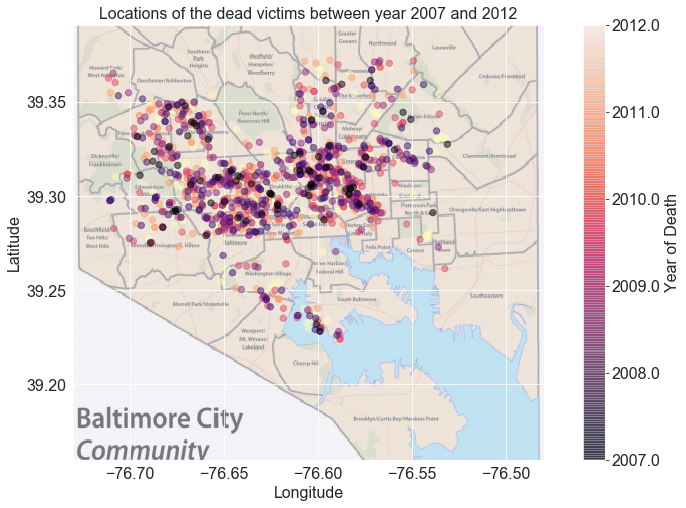

In [232]:
# #lets start with plotting the geographic locations of the victims

ax = df_homicide.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', figsize = (14,8), s = df_homicide['year'] / 50, 
                      c = 'year', cmap = plt.get_cmap('magma_r'), colorbar = False, alpha = 0.5)

plt.imshow(baltimore_img, extent=[-76.730, -76.480, 39.160, 39.391], alpha = 0.5)
plt.ylabel("Latitude")
plt.xlabel("Longitude")


yrs = df_homicide['year']
tick_values = np.linspace(yrs.min(), yrs.max(), 6)
cbar = plt.colorbar()
cbar.ax.set_yticklabels([round(y) for y in tick_values], fontsize = 16)
cbar.set_label('Year of Death', fontsize = 16)

plt.title('Locations of the dead victims between year 2007 and 2012', fontsize = 16)
plt.show()

In [196]:
#color palette to be used 

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Text(0, 0.5, 'Year')

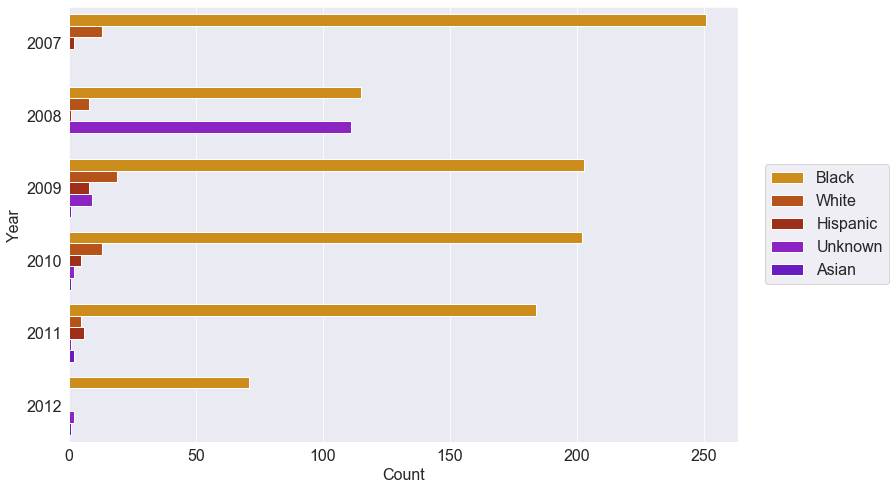

In [242]:
#Let visualize the amount races that died over the time period the data was obtained

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.legend(bbox_to_anchor=(1, 1), loc=2, labels = df_homicide['Race'])


labels = ['Black', 'White', 'Hispanic', 'Unknown', 'Asian']
ax = sns.countplot(y = 'year', hue = 'Race', data = df_homicide, palette= 'gnuplot_r')
ax.legend(labels, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

ax.set_xlabel("Count")
ax.set_ylabel("Year")

<function matplotlib.pyplot.show(*args, **kw)>

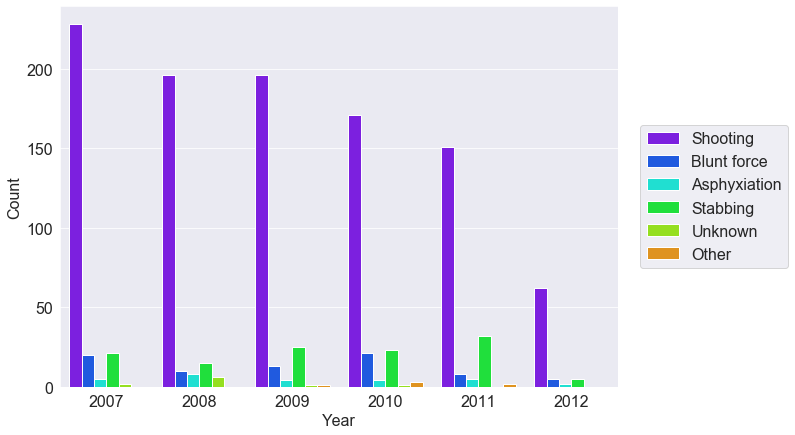

In [234]:
#lets visualize the causes of homicide over the time period the data was acquired

plt.figure(figsize=(10,7))


labels = ['Shooting', 'Blunt force', 'Asphyxiation', 'Stabbing', 'Unknown', 'Other']
ax = sns.countplot(x = 'year', hue = 'Cause of death', data = df_homicide, palette= 'gist_rainbow_r')
ax.legend(labels, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

ax.set_xlabel("Year")
ax.set_ylabel("Count")


plt.show

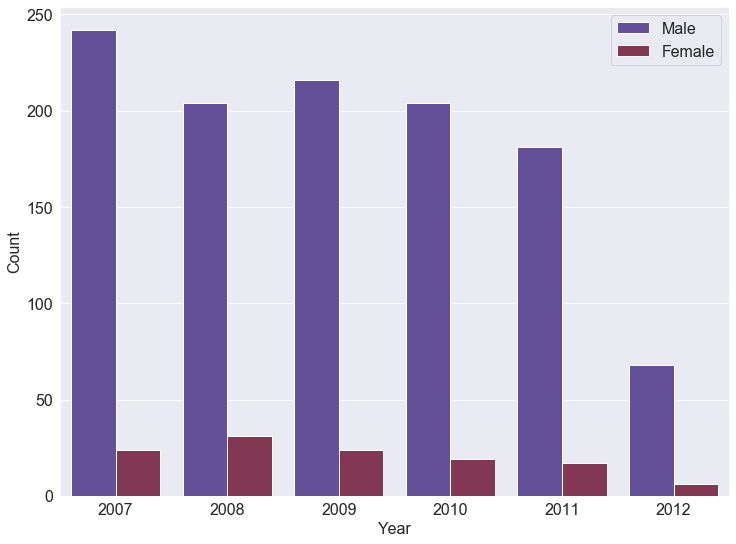

In [235]:
#lets visualize the genders were affected by the homicide over the given time period

plt.figure(figsize=(12,9))

labels = ['Male', 'Female']
ax = sns.countplot(x = 'year', hue = 'Gender', data = df_homicide, palette= 'twilight')
ax.legend(labels, bbox_to_anchor=(1.0,1.0), loc="upper right")

ax.set_xlabel("Year")
ax.set_ylabel("Count")


plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

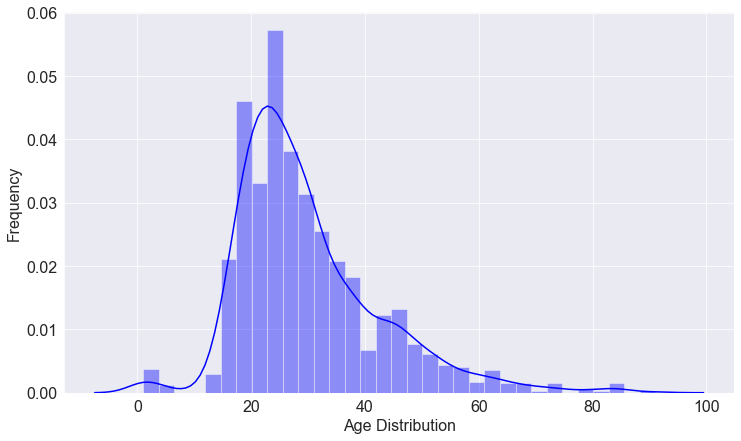

In [238]:
#lets take a look at the Age distribution

plt.figure(figsize=(12,7))

ax = sns.distplot(df_homicide['Age'], color = 'blue')
ax.set_xlabel("Age Distribution")
ax.set_ylabel('Frequency')

plt.show

### ***Note that the Age distribution is highly concentrated between 20 - 40 years***

***Box plots (also known as box and whisker plots) are a type of chart often used in explanatory data analysis to visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.***

Text(0, 0.5, 'Age')

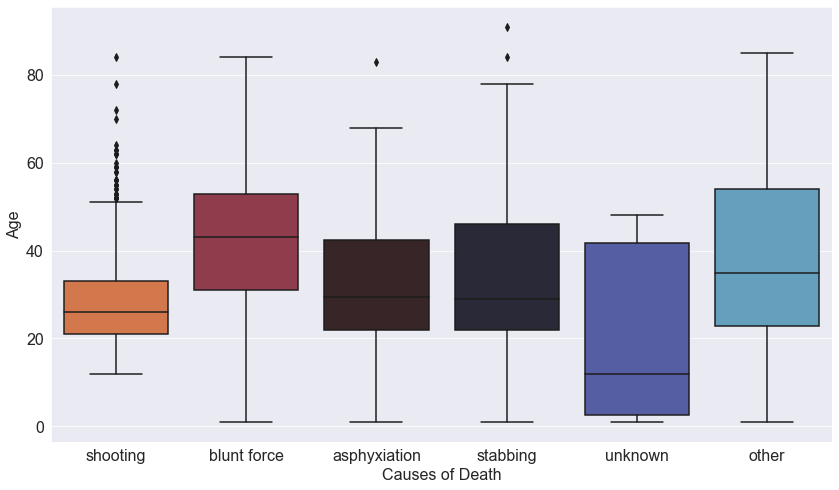

In [240]:
#let visualize the age distribution among the cause of death

plt.figure(figsize=(14,8))

ax = sns.boxplot(x="Cause of death", y="Age", data=df_homicide, palette = 'icefire_r')


ax.set_xlabel("Causes of Death")
ax.set_ylabel("Age")

**Boxplot will be used to explain the relationships between the causes of death and the age distribution accross the datasets in this scenario:**

- As seen above, the age distribution of more than 50% of the shooting, asphyxiation, stabbing and unknown categories are less than ~45 years old, where virtually ~ 50% are within 20 - 40 years age bracket; only blunt force and other has their age distribution significantly above ~40 years of age.

- Shooting categories has a lot of outliers indicating that situations other than shooting could be responsible for the death of the victims

- Blunt force, asphyxiation, stabbing and other categories have wider distribution of age indicating large dispersion of age distribution in this categories

- Unknown category is said to be is rightly and positively skewed, with lower half of the age distriution for this category having a small age distribution while the upper half of this category having a wider age distribution.

- Overall, shooting, asphyxiation, stabbing and other categories have similar distribution even though some have outliers and some have wider age distribution within some specific quartiles

Text(0, 0.5, 'Age')

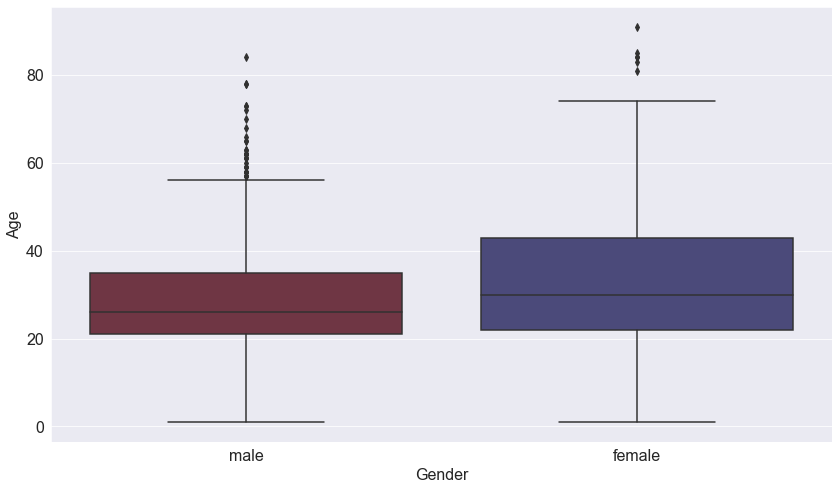

In [241]:
#let visualize the age distribution among the Genders

plt.figure(figsize=(14,8))

ax = sns.boxplot(x="Gender", y="Age", data=df_homicide, palette = 'icefire_r')


ax.set_xlabel("Gender")
ax.set_ylabel("Age")

- Based on the above box plots, the age distribution between male and female are similar, in which about 50% of their ages falls between 20 - 40 years, outliers are observed in both male and females categories

Text(0, 0.5, 'Age')

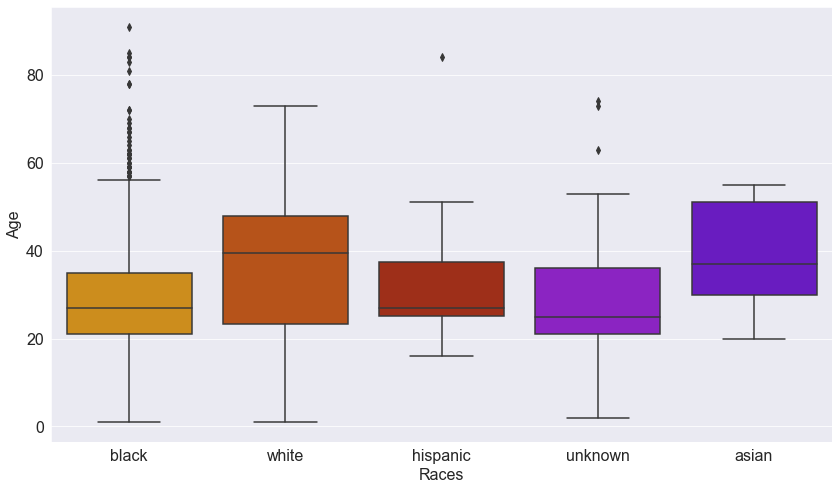

In [243]:
#let visualize the age distribution among the different races

plt.figure(figsize=(14,8))

ax = sns.boxplot(x="Race", y="Age", data=df_homicide, palette = 'gnuplot_r')


ax.set_xlabel("Races")
ax.set_ylabel("Age")

**Based on the above box plot, the following were observed:**

- The race categories all have similar age distributions even though some categories e.g. white race have a much wider range of age distribution, also the black race has a lot of outliers.

- More than ~ 50% of the age distribution in black, hispanic and unknown race categories are between 20 - 40% age brackets.

- Hispanic category is positively skewed, as the lower half of the values have a small age distribution while the upper have have a much wider age distribution.

**Summary:**
1. It was shown that the black race (predominantly male) between the age bracket (20 - 38 years old) were most affected by the homicide in Baltimore County, and the most likely cause of homicide is said to be Shooting as seen in the above plots.
2. It was shown that the year 2007 recorded the most death as seen from the plots while year 2012 recorded the least, probably due to homicide data not further updated during this time period
3. The age distribution among the races were mostly between 20 - 40 years.
3. Overall, the data was apparently acquired from a black community due to the large number of black casualities / death in respective to the homicide data showcase in our plots.